In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.probability import FreqDist

In [2]:
df= pd.read_csv('Data/Fake_Real_News_Data.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [3]:
df= df.drop(columns= 'Unnamed: 0')
df.head()

,title,text,label
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [4]:
df.duplicated().sum()

29

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

***Prepare the Data***

In [6]:
df['Tokenized'] = df['text'].apply(lambda x: x.split())
df.head()

,title,text,label,Tokenized
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[Donald, Trump, endorsed, an, unabashedly, non..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[While, some, Justice, Department, investigati..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[Trump, Proudly, Declares:, Most, Of, The, Peo..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"[Donald, Trump, spent, a, day, in, January, 20..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"[Notable, names, include, Ray, Washburne, (Com..."


In [7]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [8]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [9]:
def lemmatize(text):
    doc = nlp(text)
    lemmatized_text = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return lemmatized_text

df['Lemmatized'] = df['text'].apply(lemmatize)
df.head()

,title,text,label,Tokenized,Lemmatized
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[Donald, Trump, endorsed, an, unabashedly, non...","[Donald, Trump, endorse, unabashedly, noninter..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[While, some, Justice, Department, investigati...","[Justice, Department, investigation, adversari..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[Trump, Proudly, Declares:, Most, Of, The, Peo...","[Trump, Proudly, declare, People, insult, Dese..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"[Donald, Trump, spent, a, day, in, January, 20...","[Donald, Trump, spend, day, January, 2014, hob..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"[Notable, names, include, Ray, Washburne, (Com...","[notable, name, include, Ray, Washburne, Comme..."


In [10]:
def join_lemmatized_text(tokens):
    return ' '.join(tokens)

In [12]:
# Join list of tokens into a string with spaces between each token
df['tokens-joined'] = df['Tokenized'].map(lambda x: " ".join(x))
# Join list of lemmas into a string with spaces between each lemma
df['lemmas-joined'] = df['Lemmatized'].map(lambda x: " ".join(x))
df.head(3)

,title,text,label,Tokenized,Lemmatized,tokens-joined,lemmas-joined
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[Donald, Trump, endorsed, an, unabashedly, non...","[Donald, Trump, endorse, unabashedly, noninter...",Donald Trump endorsed an unabashedly noninterv...,Donald Trump endorse unabashedly noninterventi...
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[While, some, Justice, Department, investigati...","[Justice, Department, investigation, adversari...",While some Justice Department investigations a...,Justice Department investigation adversarial n...
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[Trump, Proudly, Declares:, Most, Of, The, Peo...","[Trump, Proudly, declare, People, insult, Dese...",Trump Proudly Declares: Most Of The People I’v...,Trump Proudly declare People insult Deserved A...


***Analyze Class Balance***

In [13]:
# Class balance
class_balance = df['label'].value_counts()
num_real_articles = class_balance['REAL']
num_fake_articles = class_balance['FAKE']

print("Class Balance:")
print("Number of Real Articles:", num_real_articles)
print("Number of Fake Articles:", num_fake_articles)

Class Balance:
Number of Real Articles: 3154
Number of Fake Articles: 3152


In [14]:
# Average word count
df['Word_Count'] = df['Tokenized'].apply(len)
average_word_count_real = df[df['label'] == 'REAL']['Word_Count'].mean()
average_word_count_fake = df[df['label'] == 'FAKE']['Word_Count'].mean()

print("\nAverage Word Count:")
print("Real News Articles:", average_word_count_real)
print("Fake News Articles:", average_word_count_fake)


Average Word Count:
Real News Articles: 873.7035510462904
Fake News Articles: 678.933692893401


In [15]:
freq_dist = df.groupby('label')['Tokenized'].apply(lambda x: FreqDist(word for sublist in x for word in sublist))

In [16]:
filter_real = df['label'] == 'REAL'
filter_real

0        True
1        True
2       False
3        True
4        True
        ...  
6330     True
6331    False
6332    False
6333    False
6334     True
Name: label, Length: 6306, dtype: bool

In [17]:
filter_fake = df['label'] == 'FAKE'
filter_fake

0       False
1       False
2        True
3       False
4       False
        ...  
6330    False
6331     True
6332     True
6333     True
6334    False
Name: label, Length: 6306, dtype: bool

In [18]:
real_text = " ".join( df.loc[filter_real, 'text'])
print(real_text[:1000],"\n")

Donald Trump endorsed an unabashedly noninterventionist approach to world affairs Monday during a day-long tour of Washington, casting doubt on the need for the North Atlantic Treaty Organization and expressing skepticism about a muscular U.S. military presence in Asia.

The foreign policy positions — outlined in a meeting with the editorial board of The Washington Post — came on a day when Trump set aside the guerrilla tactics and showman bravado that have powered his campaign to appear as a would-be presidential nominee, explaining his policies, accepting counsel and building bridges to Republican elites.

On Monday night, Trump delivered a scripted address in front of the American Israel Public Affairs Committee, prompting ovations with pledges to stand by Israel and take a hard line on peace talks with the Palestinians.

Trump’s whirlwind day of appearances around the nation’s capital was intended in part to head off an establishment push to deny him the Republican Party’s nominati

In [19]:
fake_text = " ".join( df.loc[filter_fake, 'text'])
print(fake_text[:1000],"\n")

Trump Proudly Declares: Most Of The People I’ve Insulted Deserved It By Andrew Bradford on October 27, 2016 Subscribe 
Arrogance is defined as “an insulting way of thinking or behaving that comes from believing that you are better, smarter, or more important than other people.” In other words, Donald Trump perfectly exemplifies arrogance, and he just proved that fact yet again. 
Appearing on Good Morning America Thursday morning, the GOP nominee readily defended the insulting posts he’s made on Twitter: “It’s ok, most of them deserved it.” 
Trump then declared : “I believe in fighting back when people are against me, when they tell lies, you know, I have the power of this instrument and frankly sometimes I’ll use that. And I agree sometimes it will revert back or sometimes maybe it doesn’t come out — you have to be careful with it.” 
When exactly has Trump been careful with what he posts on social media? Try never. 
Melania Trump, who was also interviewed, said that if she becomes Firs

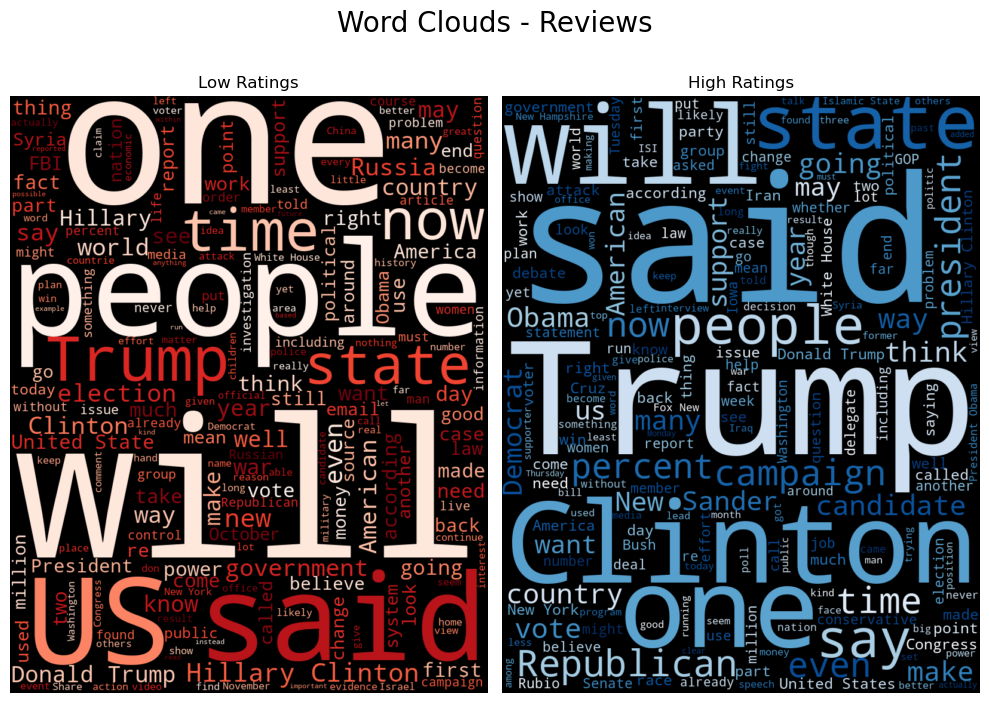

In [20]:
# Make word clouds of raw text
# Create an instance of a WordCloud and use the generate method
fake_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                     ).generate(fake_text)
real_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                      ).generate(real_text)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(fake_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(real_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Reviews', fontsize=20, y=1.05);

In [21]:
# Make a single giant string with entire group of 5 star tokens
real_tokens = " ".join( df.loc[filter_real, 'tokens-joined'])
# Make a single giant string with entire group of 1 star tokens
fake_tokens = " ".join( df.loc[filter_fake, 'tokens-joined'])

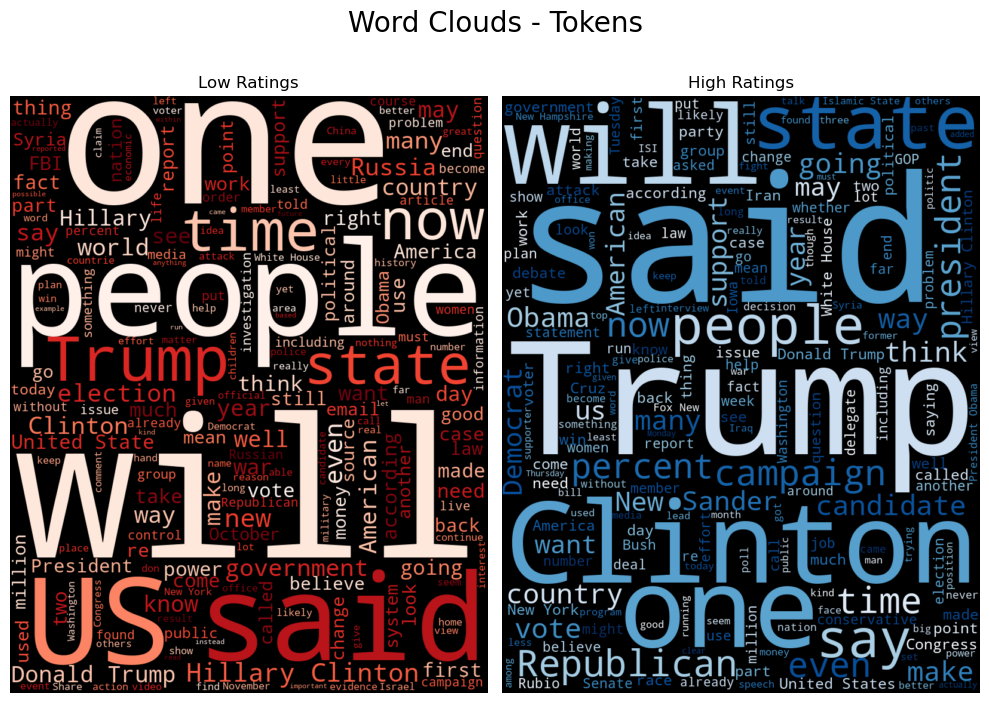

In [22]:
# Make word clouds of processed tokens
# Create an instance of a WordCloud and use the generate method
fake_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                     ).generate(fake_tokens)
real_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                      ).generate(real_tokens)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(fake_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(real_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Tokens', fontsize=20, y=1.05);

In [23]:
# Word Clouds

In [24]:
# Make a single giant string with entire group of 5 star lemmas
real_lemmas = " ".join( df.loc[filter_real, 'lemmas-joined'])
# Make a single giant string with entire group of 1 star lemmas
fake_lemmas= " ".join( df.loc[filter_fake, 'lemmas-joined'])

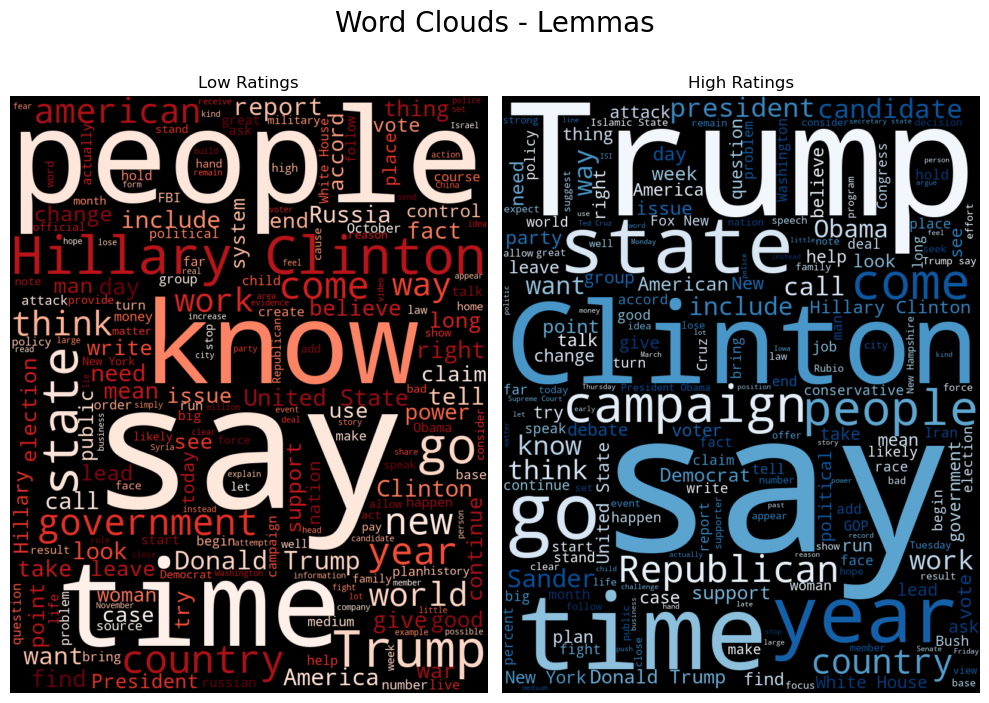

In [25]:
# Make word clouds of lemmas
# Create an instance of a WordCloud and use the generate method
fake_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                     ).generate(fake_lemmas)
real_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                      ).generate(real_lemmas)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(fake_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(real_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Lemmas', fontsize=20, y=1.05);

**Comparing Groups: Frequency Distributions**

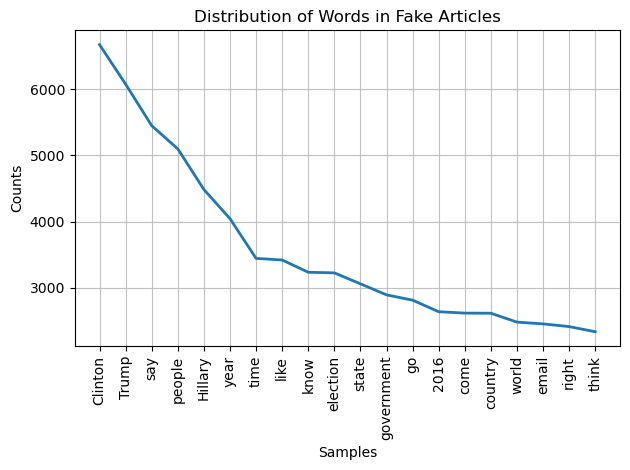

In [30]:
# Split the lemmas into individual token words
fake_lemmas_split = fake_lemmas.split()
# Pass the tokenized lemmas to the class constructor and plot the distribution 
fake_dist = FreqDist(fake_lemmas_split)
ax = low_dist.plot(20, show = False, title='Distribution of Words in Fake Articles')
plt.tight_layout()
plt.savefig('fake_article_freq_dist.png')

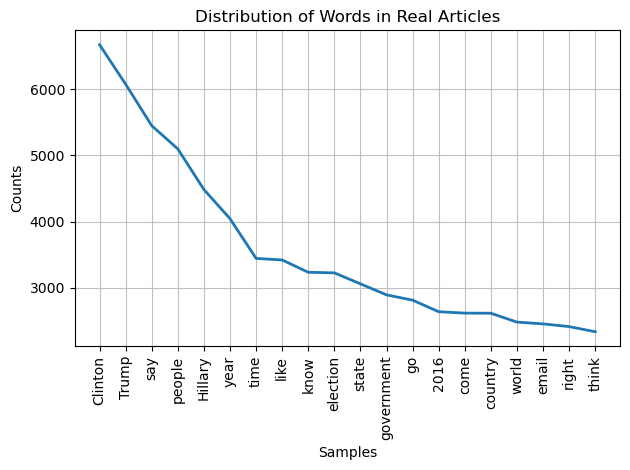

In [27]:
# Split the lemmas into individual token words
real_lemmas_split = real_lemmas.split()
# Pass the tokenized lemmas to the class constructor and plot the distribution 
real_dist = FreqDist(real_lemmas_split)
ax = low_dist.plot(20, show = False, title='Distribution of Words in Real Articles')
plt.tight_layout()
plt.savefig('real_article_freq_dist.png')

***Compare Word Frequencies***

In [28]:
# Create filters for 1 and 5 star reviews
filter_real = df['label'] == 'REAL'
filter_fake = df['label'] == 'FAKE'
filter_real.sum(), filter_fake.sum()

(3154, 3152)

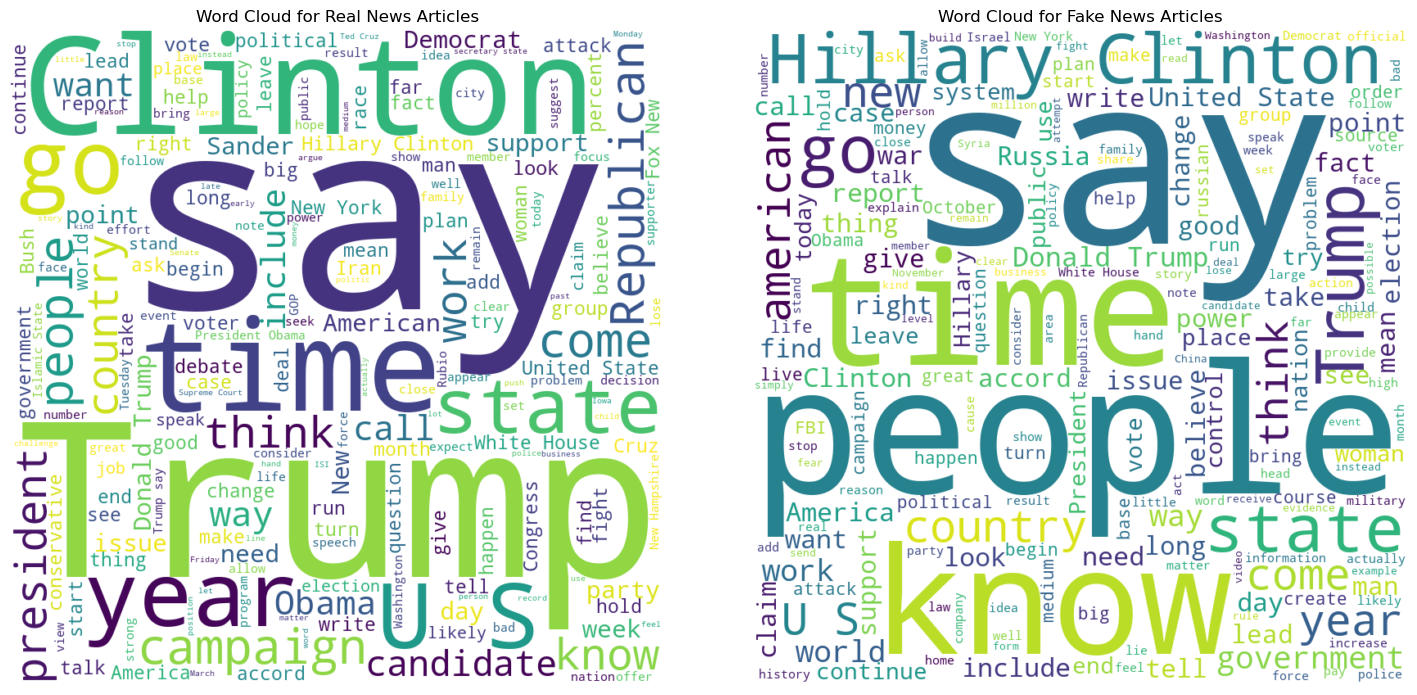

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create filters for real and fake news articles
filter_real = df['label'] == 'REAL'
filter_fake = df['label'] == 'FAKE'

# Create word clouds for real and fake news articles
real_cloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df[filter_real]['lemmas-joined']))
fake_cloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df[filter_fake]['lemmas-joined']))

# Plot word clouds
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(real_cloud, interpolation='bilinear')
axes[0].set_title('Word Cloud for Real News Articles')
axes[0].axis('off')

axes[1].imshow(fake_cloud, interpolation='bilinear')
axes[1].set_title('Word Cloud for Fake News Articles')
axes[1].axis('off')

plt.tight_layout()
plt.show()